<a href="https://colab.research.google.com/github/SmithTheGreat/Romit-Ghosh-MIT-Maker-Portfolio-SRC/blob/main/LSTM_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import yfinance as yf
import pandas as pd
import datetime as dt
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [18]:
ticker = "AAL"
file = f'stock_market_data-{ticker}.csv'
start = dt.datetime(2005, 1, 1)
end = dt.datetime.today()

if not os.path.exists(file):
    df = yf.download(ticker, start="2005-01-01")
    df.reset_index(inplace=True)
    df.to_csv(file, index=False)
    print()
    print("Saved CSV")
else:
    df = pd.read_csv(file)
    print("Loaded existing CSV")
print()
print(df.head())

Loaded existing CSV

         Date               Close                High                 Low  \
0         NaN                 AAL                 AAL                 AAL   
1  2005-09-27  18.194908142089844  20.174665424454105  18.006360942615846   
2  2005-09-28   19.32619857788086   19.35448146703129  18.100635484879604   
3  2005-09-29   19.05280113220215   19.40161621028288  18.949100810180603   
4  2005-09-30   19.80699920654297  19.844707931656124   19.02452383047528   

                 Open   Volume  
0                 AAL      AAL  
1   19.84470557770398   961200  
2  18.194908185774693  5747900  
3  19.231922485710435  1078200  
4  19.099943078838308  3123300  


In [6]:
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)

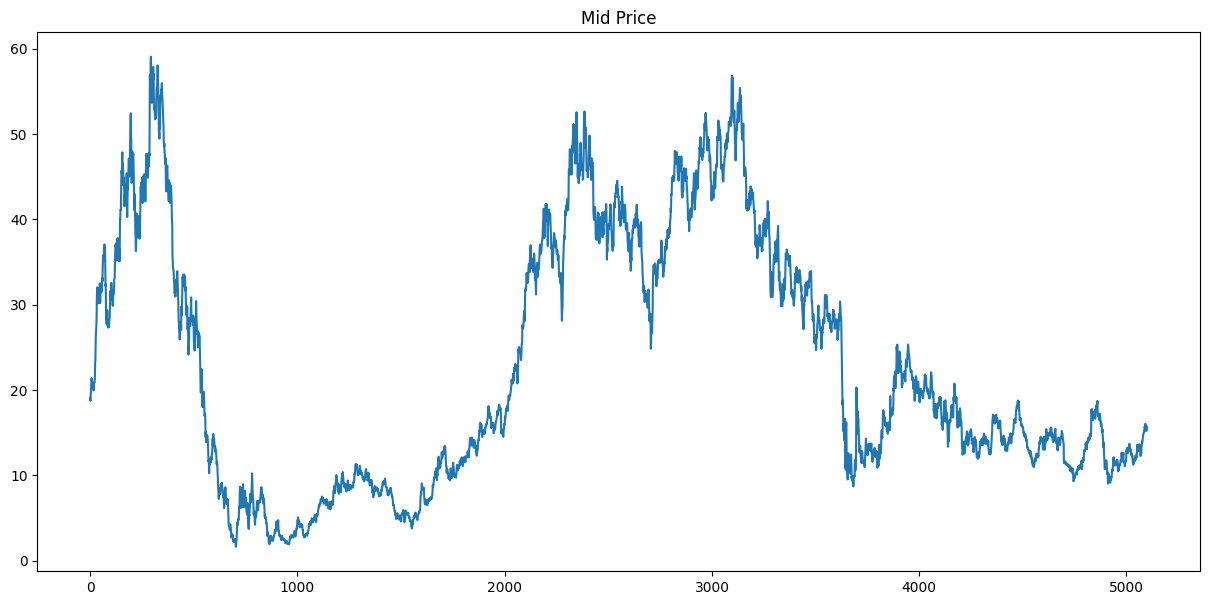

In [7]:
mid = (df['High'] + df['Low']) / 2
plt.figure(figsize=(15,7))
plt.plot(mid)
plt.title("Mid Price")
plt.show()

In [8]:
mid = mid.to_numpy().reshape(-1,1)
train = mid[:len(mid)//2]
test = mid[len(mid)//2:]



In [9]:
scaler = MinMaxScaler()
window = 2500
n = train.shape[0]

for i in range(0, n, window):
    end = min(i+window, n)
    scaler.fit(train[i:end])
    train[i:end] = scaler.transform(train[i:end])

test = scaler.transform(test)



In [10]:
seq_len = 50
X_train = []
y_train = []
for i in range(len(train)-seq_len):
    X_train.append(train[i:i+seq_len])
    y_train.append(train[i+seq_len])
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []
for i in range(len(test)-seq_len):
    X_test.append(test[i:i+seq_len])
    y_test.append(test[i+seq_len])
X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(seq_len,1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

pred = model.predict(X_test)

Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0563 - val_loss: 0.0154
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0010 - val_loss: 0.0134
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.4353e-04 - val_loss: 0.0134
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 8.0688e-04 - val_loss: 0.0123
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 7.6662e-04 - val_loss: 0.0117
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


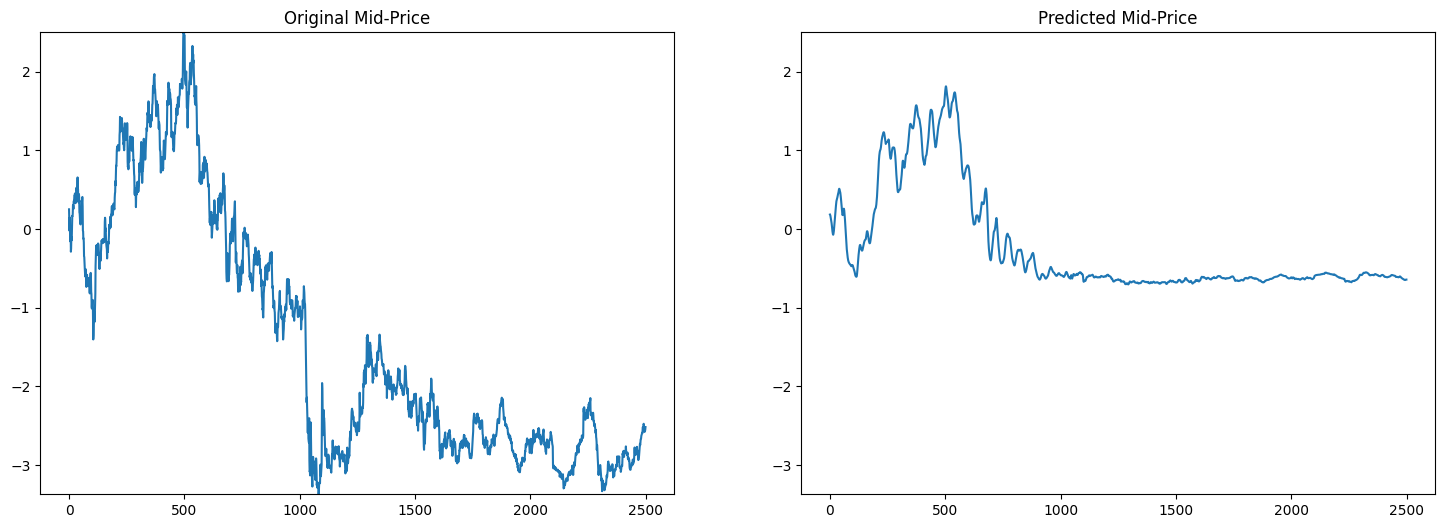

In [20]:
plt.figure(figsize=(18,6))

y_min = min(y_test.min(), pred.min())
y_max = max(y_test.max(), pred.max())

plt.subplot(1,2,1)
plt.plot(y_test)
plt.title("Original Mid-Price")
plt.ylim(y_min, y_max)

plt.subplot(1,2,2)
plt.plot(pred)
plt.title("Predicted Mid-Price")
plt.ylim(y_min, y_max)

plt.show()